# Figure 2: Gravitational stirring

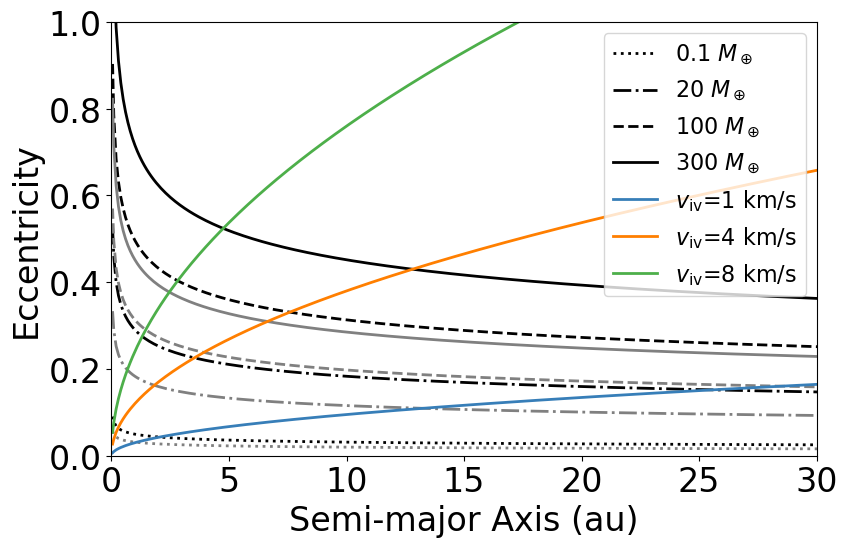

In [5]:
# STSM 10/24/17

# determine critical impact velocities for onset of vaporization of ejecta
# convert to mean eccentricity dispersion for a swarm of planetesimals vs. semi-major axis

import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['legend.numpoints'] = 1
import scipy.integrate as integrate

plt.figure(figsize=(9, 6))
plt.rcParams.update({'font.size': 24})

#https://gist.github.com/thriveth/8560036
CBcol = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# set up impact velocity array (used as Vesc to build Rt and Mt of targets)
vimax  = 20000 # m/s
nvi    = 200 # number of vi points
vi = np.linspace(0,vimax,nvi)
vi[0]=vi[1]/2 # don not have 0 impact velocity

# set up independent up array for the Hugoniots for all the materials
upmax  = 20000 # m/s
nup    = 50000 # number of up points
up = np.linspace(0,upmax,nup)

# Fundamental constants
G=6.67e-11 # mks
Msun = 1.98855e30 # kg
Mearth = 5.972e24 # kg
R = 8.314 # J/K/mol Gas constant

AU2m = 1.496e11
semimax  = 35.*AU2m # m
nsemi    = 350 # number of semi points
semiarr = np.linspace(0,semimax,nsemi)
semiarr[0]=semiarr[1]/2. # don't have a=0
vkeparr = np.sqrt(G*Msun/semiarr)

eifact = 1. + (.5*.5) # i=0.5e
ice_vcrit=1000.0 # m/s
ice_ecrit = np.sqrt(((ice_vcrit/vkeparr)**2.) / eifact)

qtz_vcrit=4000.0 # m/s
qtz_ecrit = np.sqrt(((qtz_vcrit/vkeparr)**2.) / eifact)

fo_vcrit=8000.0 # m/s
fo_ecrit = np.sqrt(((fo_vcrit/vkeparr)**2.) / eifact)


# calc Tanaka eccentricities for planetesimals stirred by an embryo

Mproto=0.1*Mearth # kg
h=(Mproto/Msun/3.)**(1./3.) # reduced hill radius; should be mks
r_plsml = 100000.0 # m
rho_plsml = 3000.0 # kg/m3
C_d = 1. # gas coef
rho_gas = 1.E-7 # kg/m3
e_stir_arr_d = 1.75 * h * ( (4.* r_plsml * rho_plsml) / (3. * math.pi * C_d * rho_gas * semiarr) )**(1./5.)

Mproto=20.*Mearth # kg
h=(Mproto/Msun/3.)**(1./3.) # reduced hill radius; should be mks
e_stir_arr_e = 1.75 * h * ( (4.* r_plsml * rho_plsml) / (3. * math.pi * C_d * rho_gas * semiarr) )**(1./5.)

Mproto=100.*Mearth # kg
h=(Mproto/Msun/3.)**(1./3.) # reduced hill radius; should be mks
e_stir_arr_f = 1.75 * h * ( (4.* r_plsml * rho_plsml) / (3. * math.pi * C_d * rho_gas * semiarr) )**(1./5.)

Mproto=300.*Mearth # kg
h=(Mproto/Msun/3.)**(1./3.) # reduced hill radius; should be mks
e_stir_arr_g = 1.75 * h * ( (4.* r_plsml * rho_plsml) / (3. * math.pi * C_d * rho_gas * semiarr) )**(1./5.)



Mproto=0.1*Mearth # kg
h=(Mproto/Msun/3.)**(1./3.) # reduced hill radius; should be mks
r_plsml = 100000.0 # m
rho_plsml = 3000.0 # kg/m3
C_d = 1. # gas coef
rho_gas = 1.E-6 # kg/m3
e_stir_arr_h = 1.75 * h * ( (4.* r_plsml * rho_plsml) / (3. * math.pi * C_d * rho_gas * semiarr) )**(1./5.)

Mproto=20.*Mearth # kg
h=(Mproto/Msun/3.)**(1./3.) # reduced hill radius; should be mks
e_stir_arr_i = 1.75 * h * ( (4.* r_plsml * rho_plsml) / (3. * math.pi * C_d * rho_gas * semiarr) )**(1./5.)

Mproto=100.*Mearth # kg
h=(Mproto/Msun/3.)**(1./3.) # reduced hill radius; should be mks
e_stir_arr_j = 1.75 * h * ( (4.* r_plsml * rho_plsml) / (3. * math.pi * C_d * rho_gas * semiarr) )**(1./5.)

Mproto=300.*Mearth # kg
h=(Mproto/Msun/3.)**(1./3.) # reduced hill radius; should be mks
e_stir_arr_k = 1.75 * h * ( (4.* r_plsml * rho_plsml) / (3. * math.pi * C_d * rho_gas * semiarr) )**(1./5.)



plt.plot(semiarr/AU2m,e_stir_arr_d,color='black',ls=':',linewidth=2.0,label='0.1 $M_\oplus$')
plt.plot(semiarr/AU2m,e_stir_arr_e,color='black',ls='-.',linewidth=2.0,label='20 $M_\oplus$')
plt.plot(semiarr/AU2m,e_stir_arr_f,color='black',ls='--',linewidth=2.0,label='100 $M_\oplus$')
plt.plot(semiarr/AU2m,e_stir_arr_g,color='black',ls='-',linewidth=2.0,label='300 $M_\oplus$')

plt.plot(semiarr/AU2m,e_stir_arr_h,color='grey',ls=':',linewidth=2.0)
plt.plot(semiarr/AU2m,e_stir_arr_i,color='grey',ls='-.',linewidth=2.0)
plt.plot(semiarr/AU2m,e_stir_arr_j,color='grey',ls='--',linewidth=2.0)
plt.plot(semiarr/AU2m,e_stir_arr_k,color='grey',ls='-',linewidth=2.0)

plt.plot(semiarr/AU2m,ice_ecrit,color=CBcol[0],linewidth=2.0,label='$v_{\mathrm{iv}}$=1 km/s')
plt.plot(semiarr/AU2m,qtz_ecrit,color=CBcol[1],linewidth=2.0,label='$v_{\mathrm{iv}}$=4 km/s')
plt.plot(semiarr/AU2m,fo_ecrit,color=CBcol[2],linewidth=2.0,label='$v_{\mathrm{iv}}$=8 km/s')
#plt.grid()
plt.xlabel('Semi-major Axis (au)')#,fontsize=18)
plt.ylabel('Eccentricity')#,fontsize=18)
plt.xlim(0,30)
plt.ylim(0.,1.)
#plt.legend()#loc='upper right', fontsize='medium')
plt.legend(fontsize=16)
#leg.get_frame().set_linewidth(0.0)
#plt.rcParams.update({'axes.titlesize': 'medium'})
#plt.rcParams.update({'axes.labelsize': 'medium'})
#plt.tick_params(labelsize=20)

plt.tight_layout()#pad=0.4,w_pad=0.5,h_pad=1.0)
plt.savefig('./plots/Fig2-stirring2.pdf', format='pdf', dpi=1000,transparent=True)

#plt.show()

#============== END OF FILE =================
